In [125]:
import os

from matplotlib import pyplot as plt
import numpy as np
import pickle
from PIL import Image
from pycocotools.coco import COCO

In [126]:
train = COCO('coco/annotations/instances_train2017.json')
val = COCO('coco/annotations/instances_val2017.json')
train.loadCats(train.getCatIds()[0]), val.loadCats(val.getCatIds()[0])

loading annotations into memory...
Done (t=26.43s)
creating index...
index created!
loading annotations into memory...
Done (t=0.30s)
creating index...
index created!


([{'supercategory': 'person', 'id': 1, 'name': 'person'}],
 [{'supercategory': 'person', 'id': 1, 'name': 'person'}])

In [127]:
def get_majority_person_images_and_masks(coco_dataset, img_dir):
    out = []

    person_annot_ids = coco_dataset.getAnnIds(catIds=[1])
    person_annot_dicts = coco_dataset.loadAnns(person_annot_ids)

    for annot_dict in person_annot_dicts:
        img_dict = coco_dataset.loadImgs([annot_dict['image_id']])
        assert len(img_dict) == 1
        img_dict = img_dict[0]
        size = img_dict['height'] * img_dict['width']
        if annot_dict['area'] / size < 0.5:
            continue
        
        img = np.array(Image.open(os.path.join(img_dir, img_dict['file_name'])))
        mask = coco_dataset.annToMask(annot_dict)

        out.append((img, mask))
    
    return out

dataset = get_majority_person_images_and_masks(train, 'coco/images/train2017') + get_majority_person_images_and_masks(val, 'coco/images/val2017')

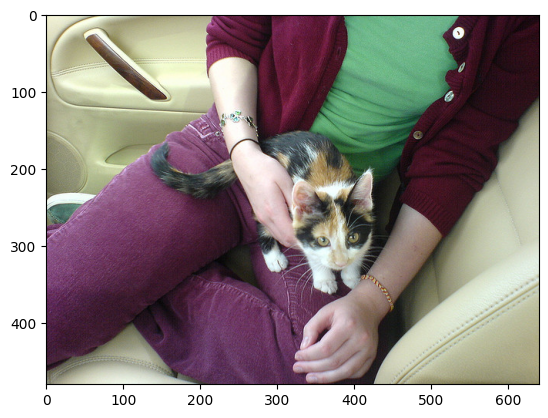

In [128]:
plt.imshow(dataset[0][0])

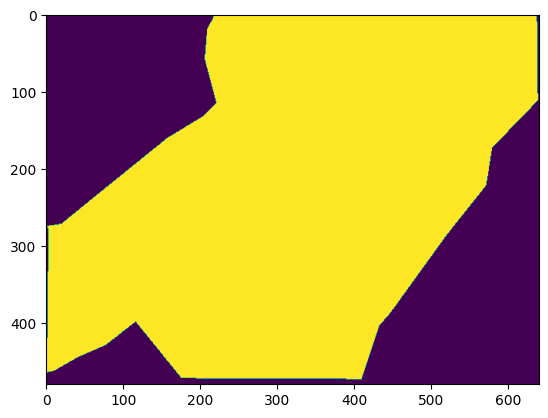

In [129]:
plt.imshow(dataset[0][1])

In [131]:
with open('dataset.pkl', 'wb') as f:
    pickle.dump(dataset, f)